Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


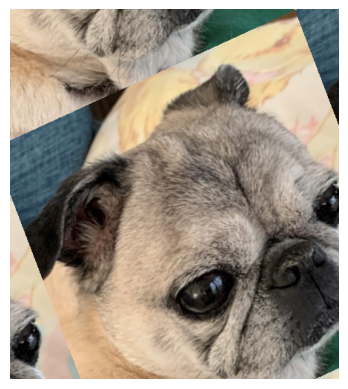

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# GoogleDriveをマウント
from google.colab import drive
drive.mount("/content/drive")

# 画像ファイル（PIL形式）の読み込み
img = load_img("drive/MyDrive/test2.jpg")

# PIL形式をnumpyのndarray形式に変換
x = img_to_array(img)

# 4次元テンソル形式に変換
x = np.expand_dims(x, axis=0)

# データ拡張クラスの定義とインスタンスの作成
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=10,
    fill_mode="wrap",
    rescale=1.0/255.0,
)

# 拡張・正規化したデータのジェネレータを生成
gen = datagen.flow(x, batch_size=1, seed=12345)

augmented_img = next(gen)[0]
plt.imshow(augmented_img)
plt.axis("off")
plt.show()